# SpeakSense - Language Detection System

The objective of this project is to develop a robust and accurate system capable of detecting the language spoken in audio recordings. By leveraging advanced machine learning algorithms and signal processing techniques, the system aims to accurately identify the language spoken in various audio inputs, spanning diverse accents, dialects, and environmental conditions. This language detection solution seeks to provide practical applications in speech recognition, transcription, translation, and other fields requiring language-specific processing, thereby enhancing accessibility and usability across linguistic boundaries.

In [29]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
import soundfile as sf

import librosa
import os
import glob
import warnings

from tqdm import tqdm

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

if not (os.path.exists('../data/audio-dataset-with-10-indian-languages') or os.path.exists('../data/audio_dataset_indian_languages')):
    od.download(dataset_id_or_url="https://www.kaggle.com/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages", data_dir='../data/')
    os.rename('../data/audio-dataset-with-10-indian-languages/', '../data/audio_dataset_indian_languages/')

if not (os.path.exists('../data/spoken-language-identification') or os.path.exists('../data/spoken_language_identification')):
    od.download(dataset_id_or_url="https://www.kaggle.com/datasets/toponowicz/spoken-language-identification", data_dir='../data/')
    os.rename('../data/spoken-language-identification/', '../data/spoken_language_identification/')

# Exploratory Data Analysis

In [2]:
spoken_languages_train_path_dataset = '../data/spoken_language_identification/train/train/'
indian_languages_train_path_dataset = '../data/audio_dataset_indian_languages/Language Detection Dataset/*/*.mp3'

filename_de = ['de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac', 'de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.flac']
filename_en = ['en_f_058b70233667e1b64506dddf9f9d6b46.fragment1.flac', 'en_f_386ee651f6f1539ff5622c55e234e5a4.fragment3.flac']
filename_es = ['es_f_47bd2e6178465cd745c86c9db5ffe447.fragment1.flac', 'es_f_ea5fee5b16a663c988fbddb2137cf573.fragment15.flac']

In [3]:
data_de, sample_rate_de = librosa.load(spoken_languages_train_path_dataset + filename_de[0])
print(f'Audio Data Sample Rate: {sample_rate_de}')
print(f'Audio Data: {data_de}')

ipd.Audio(data=data_de, rate=sample_rate_de)

Audio Data Sample Rate: 22050
Audio Data: [-0.03903198 -0.03997803 -0.05319214 ... -0.00836182  0.01141357
  0.01940918]


In [4]:
data_en, sample_rate_en = librosa.load(spoken_languages_train_path_dataset + filename_en[0])
print(f'Audio Data Sample Rate: {sample_rate_en}')
print(f'Audio Data: {data_en}')

ipd.Audio(data=data_en, rate=sample_rate_en)

Audio Data Sample Rate: 22050
Audio Data: [ 0.05645752  0.05322266  0.04736328 ...  0.0218811  -0.09661865
 -0.19638062]


In [5]:
data_es, sample_rate_es = librosa.load(spoken_languages_train_path_dataset + filename_es[0])
print(f'Audio Data Sample Rate: {sample_rate_es}')
print(f'Audio Data: {data_es}')

ipd.Audio(data=data_es, rate=sample_rate_es)

Audio Data Sample Rate: 22050
Audio Data: [-0.02639771 -0.02844238 -0.02212524 ... -0.13754272  0.04101562
  0.13989258]


In [6]:
data_bengali, sample_rate_bengali = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Bengali/0.mp3')
print(f'Audio Data Sample Rate: {sample_rate_bengali}')
print(f'Audio Data: {data_bengali}')

ipd.Audio(data=data_bengali, rate=sample_rate_bengali)

Audio Data Sample Rate: 22050
Audio Data: [-1.8423570e-14 -6.3668206e-15 -4.9556743e-15 ... -1.0889594e-02
 -1.2082971e-02 -1.1936359e-02]


In [7]:
data_gujarati, sample_rate_gujarati = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Gujarati/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_gujarati}')
print(f'Audio Data: {data_gujarati}')

ipd.Audio(data=data_gujarati, rate=sample_rate_gujarati)

Audio Data Sample Rate: 22050
Audio Data: [-2.5410151e-12 -5.5806935e-12 -2.0012728e-12 ...  7.7287614e-02
  9.4425559e-02  1.0582124e-01]


In [8]:
data_hindi, sample_rate_hindi = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Hindi/0.mp3')
print(f'Audio Data Sample Rate: {sample_rate_hindi}')
print(f'Audio Data: {data_hindi}')

ipd.Audio(data=data_hindi, rate=sample_rate_hindi)

Audio Data Sample Rate: 22050
Audio Data: [-1.2490009e-15 -5.1070259e-15 -2.1094237e-15 ...  4.0550900e-04
  4.1969854e-04  2.8167310e-04]


In [9]:
data_kannada, sample_rate_kannada = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Kannada/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_kannada}')
print(f'Audio Data: {data_kannada}')

ipd.Audio(data=data_kannada, rate=sample_rate_kannada)

Audio Data Sample Rate: 22050
Audio Data: [ 7.0698071e-16  3.8798611e-16 -2.1047293e-16 ... -7.7552974e-02
 -6.9335490e-02 -4.5347739e-02]


In [10]:
data_malayalam, sample_rate_malayalam = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Malayalam/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_malayalam}')
print(f'Audio Data: {data_malayalam}')

ipd.Audio(data=data_malayalam, rate=sample_rate_malayalam)

Audio Data Sample Rate: 22050
Audio Data: [ 2.3996221e-14  1.2633653e-14 -2.1475695e-15 ...  1.2440508e-04
  1.5607508e-04  1.2696616e-04]


In [11]:
data_marathi, sample_rate_marathi = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Marathi/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_marathi}')
print(f'Audio Data: {data_marathi}')

ipd.Audio(data=data_marathi, rate=sample_rate_marathi)

Audio Data Sample Rate: 22050
Audio Data: [ 4.0967670e-14  1.5520557e-14  8.8702002e-15 ... -9.8565608e-05
 -3.0861851e-05 -2.0965597e-06]


In [12]:
data_punjabi, sample_rate_punjabi = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Punjabi/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_punjabi}')
print(f'Audio Data: {data_punjabi}')

ipd.Audio(data=data_punjabi, rate=sample_rate_punjabi)

Audio Data Sample Rate: 22050
Audio Data: [ 7.1054274e-14 -6.3948846e-14 -2.3092639e-13 ...  2.5493443e-02
  1.4704423e-02  3.6526695e-03]


In [13]:
data_tamil, sample_rate_tamil = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Tamil/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_tamil}')
print(f'Audio Data: {data_tamil}')

ipd.Audio(data=data_tamil, rate=sample_rate_tamil)

Audio Data Sample Rate: 22050
Audio Data: [-3.9079850e-13  3.1974423e-13  8.5265128e-14 ...  2.6643455e-02
 -1.6273517e-02 -3.2037131e-02]


In [14]:
data_telugu, sample_rate_telugu = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Telugu/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_telugu}')
print(f'Audio Data: {data_telugu}')

ipd.Audio(data=data_telugu, rate=sample_rate_telugu)

Audio Data Sample Rate: 22050
Audio Data: [ 3.4607888e-09 -2.9523269e-08  4.2286707e-08 ... -7.3971679e-03
 -7.4022897e-03 -7.0107952e-03]


In [15]:
data_urdu, sample_rate_urdu = librosa.load('../data/audio_dataset_indian_languages/Language Detection Dataset/Urdu/214.mp3')
print(f'Audio Data Sample Rate: {sample_rate_urdu}')
print(f'Audio Data: {data_urdu}')

ipd.Audio(data=data_urdu, rate=sample_rate_urdu)

Audio Data Sample Rate: 22050
Audio Data: [-9.1801267e-10 -7.2974093e-10 -4.9696004e-11 ... -2.3374293e-02
 -2.5808681e-02 -2.0873908e-02]


In [16]:
def amplitude_plot_audio(data_dict: dict, n_rows: int = 1, n_cols: int = 3, figsize: tuple = (20, 5), file_name: str = 'amplitude_plot'):
    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

    for key in data_dict.keys():
        idx, lang = key.split('_')
        idx = int(idx)

        ax[idx].plot(data_dict[key])

        ax[idx].set_ylabel('Amplitude')
        ax[idx].set_xlabel('Time in samples')
        ax[idx].set_title(f'Audio Amplitude vs Time ({lang})')

    plt.savefig(f'../data/eda_results/{file_name}.png')

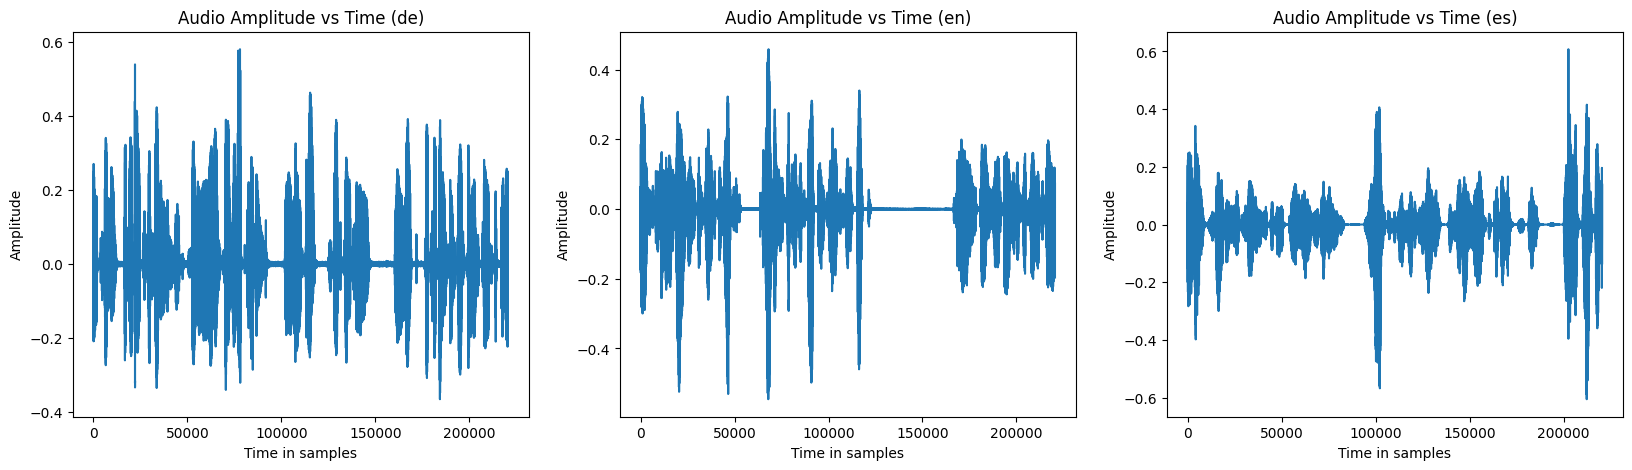

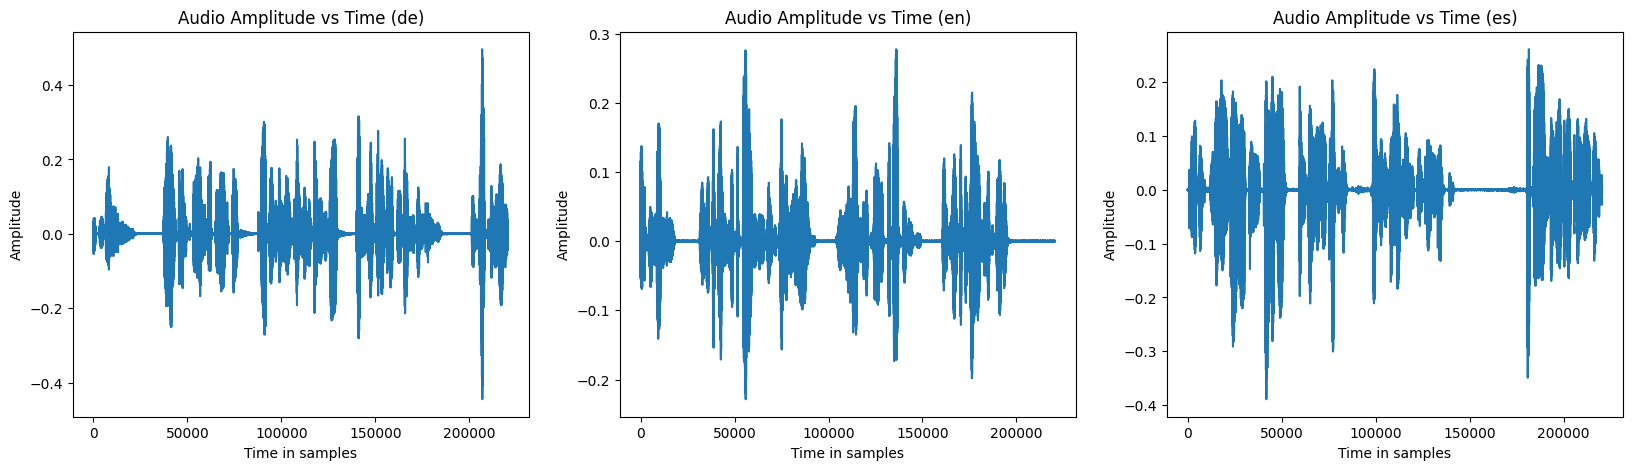

In [17]:
for i in range(len(filename_de)):
    data_de, _ = librosa.load(spoken_languages_train_path_dataset + filename_de[i])
    data_en, _ = librosa.load(spoken_languages_train_path_dataset + filename_en[i])
    data_es, _ = librosa.load(spoken_languages_train_path_dataset + filename_es[i])

    data_dict = {'0_de': data_de, '1_en': data_en, '2_es': data_es}

    amplitude_plot_audio(data_dict=data_dict, file_name='amplitude_plot_de_en_es')

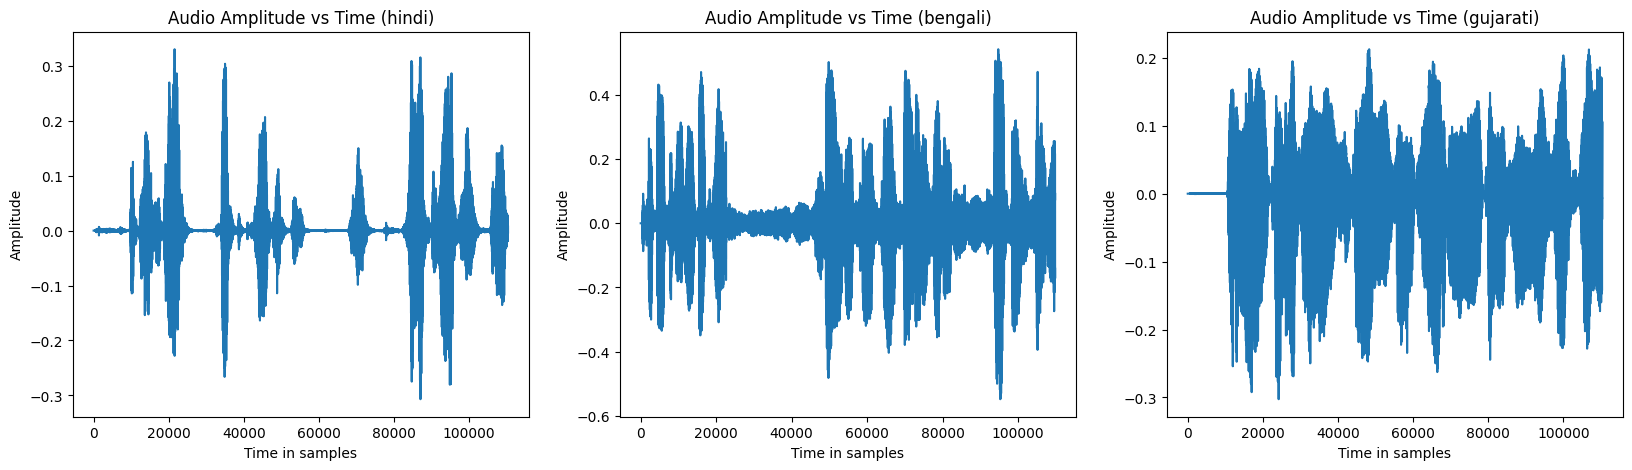

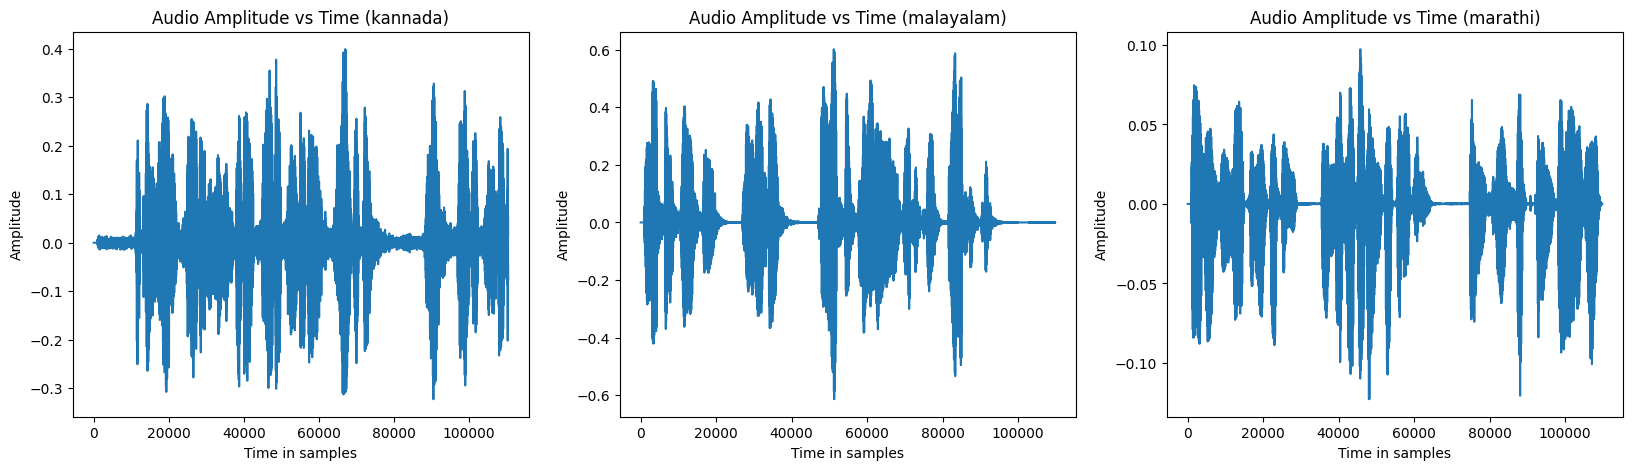

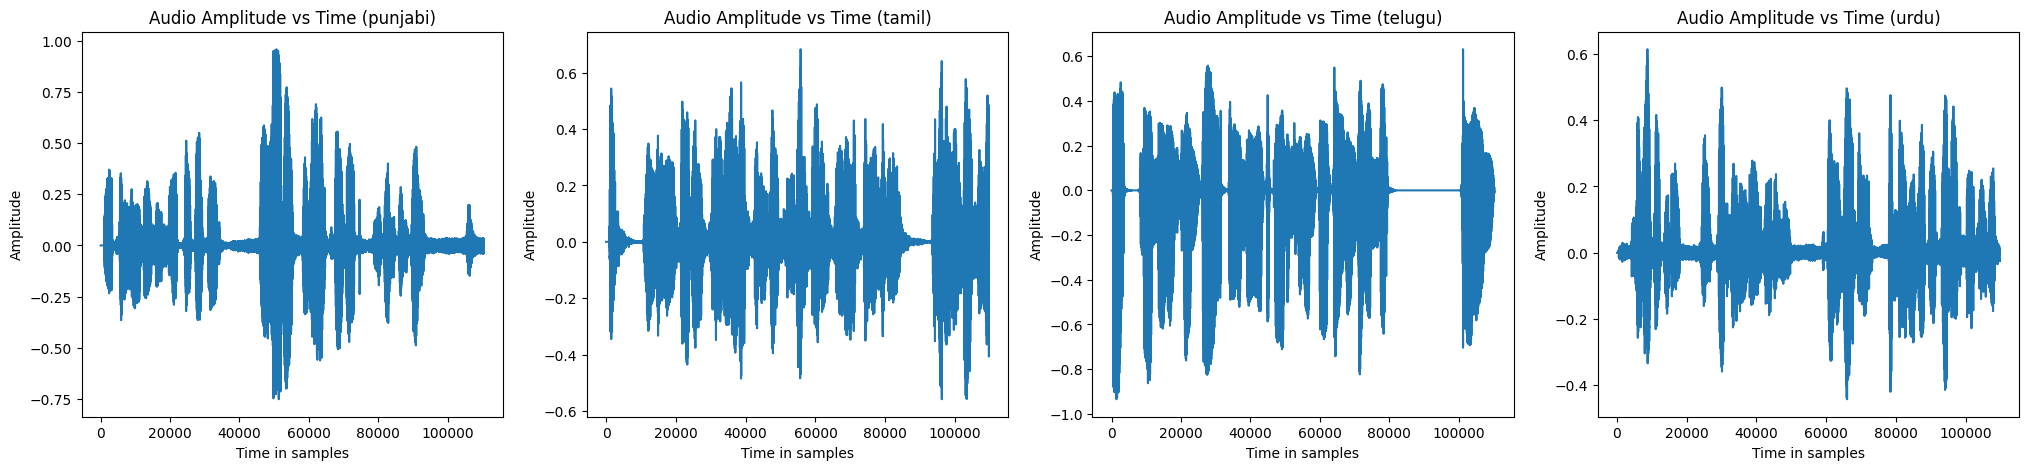

In [18]:
indian_languages_list = ['Hindi', 'Bengali', 'Gujarati']
data_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data_dict[f'{idx}_{lang.lower()}'] = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/214.mp3')[0]

amplitude_plot_audio(data_dict=data_dict, file_name='amplitude_plot_hbg')

indian_languages_list = ['Kannada', 'Malayalam', 'Marathi']
data_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data_dict[f'{idx}_{lang.lower()}'] = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/214.mp3')[0]

amplitude_plot_audio(data_dict=data_dict, file_name='amplitude_plot_kmm')

indian_languages_list = ['Punjabi', 'Tamil', 'Telugu', 'Urdu']
data_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data_dict[f'{idx}_{lang.lower()}'] = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/214.mp3')[0]

amplitude_plot_audio(data_dict=data_dict, n_rows=1, n_cols=4, figsize=(25, 5), file_name='amplitude_plot_pttu')

In [19]:
def spectogram_plot_audio(data_dict: dict, sample_rate_dict: dict, n_rows: int = 1, n_cols: int = 3, figsize: tuple = (20, 5), file_name: str = 'spectogram_plot'):
    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

    for key in data_dict.keys():
        idx, lang = key.split('_')
        idx = int(idx)

        ax[idx].specgram(data_dict[key], Fs=sample_rate_dict[key])

        ax[idx].set_ylabel('Frequency [Hz]')
        ax[idx].set_xlabel('Time [sec]')
        ax[idx].set_title(f'Audio Frequency vs Time ({lang})')

    plt.savefig(f'../data/eda_results/{file_name}.png')

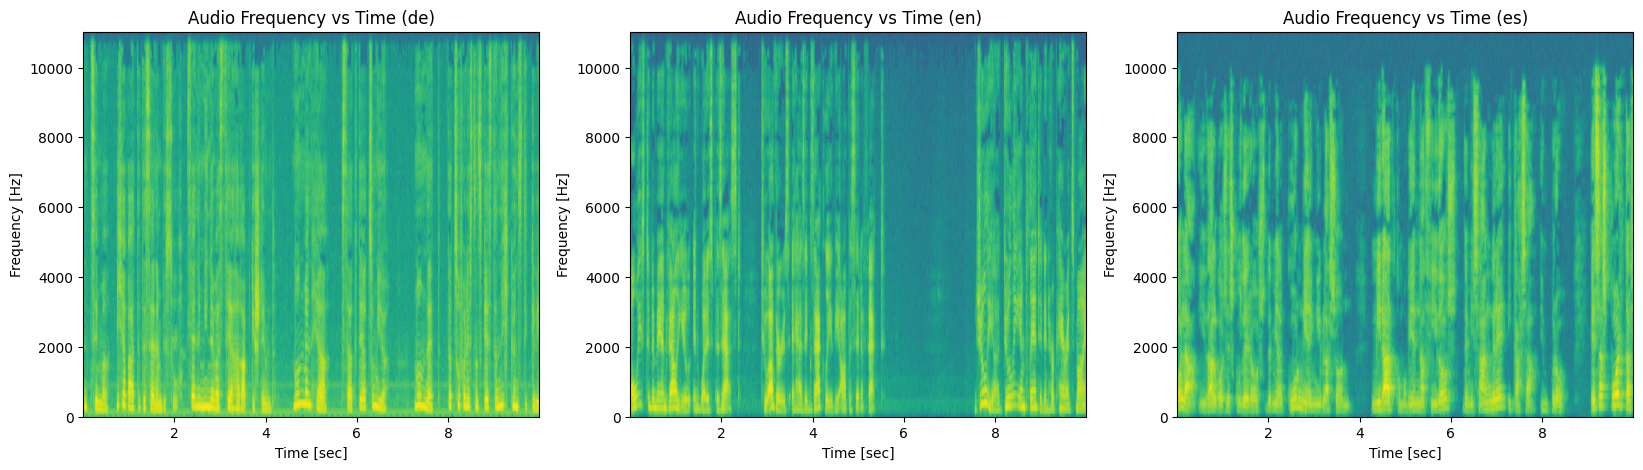

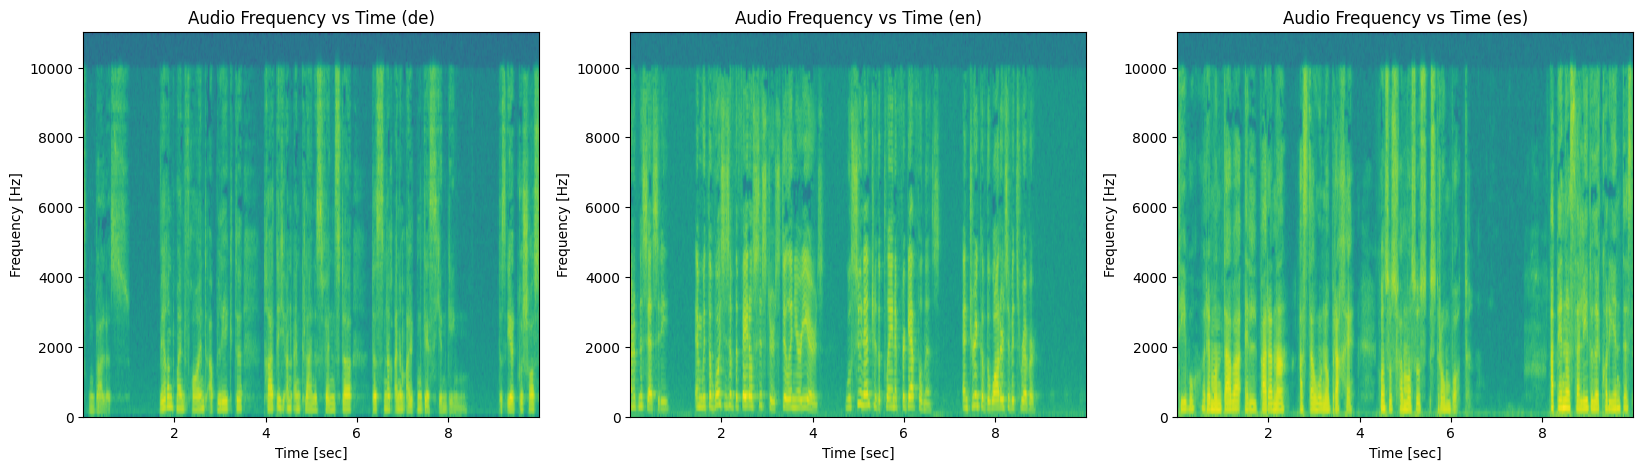

In [20]:
for i in range(len(filename_de)):
    data_de, samplerate_de = librosa.load(spoken_languages_train_path_dataset + filename_de[i])
    data_en, samplerate_en = librosa.load(spoken_languages_train_path_dataset + filename_en[i])
    data_es, samplerate_es = librosa.load(spoken_languages_train_path_dataset + filename_es[i])

    data_dict = {'0_de': data_de, '1_en': data_en, '2_es': data_es}
    sample_rate_dict = {'0_de': samplerate_de, '1_en': samplerate_en, '2_es': samplerate_es}

    spectogram_plot_audio(data_dict=data_dict, sample_rate_dict=sample_rate_dict, file_name='spectogram_plot_de_en_es')

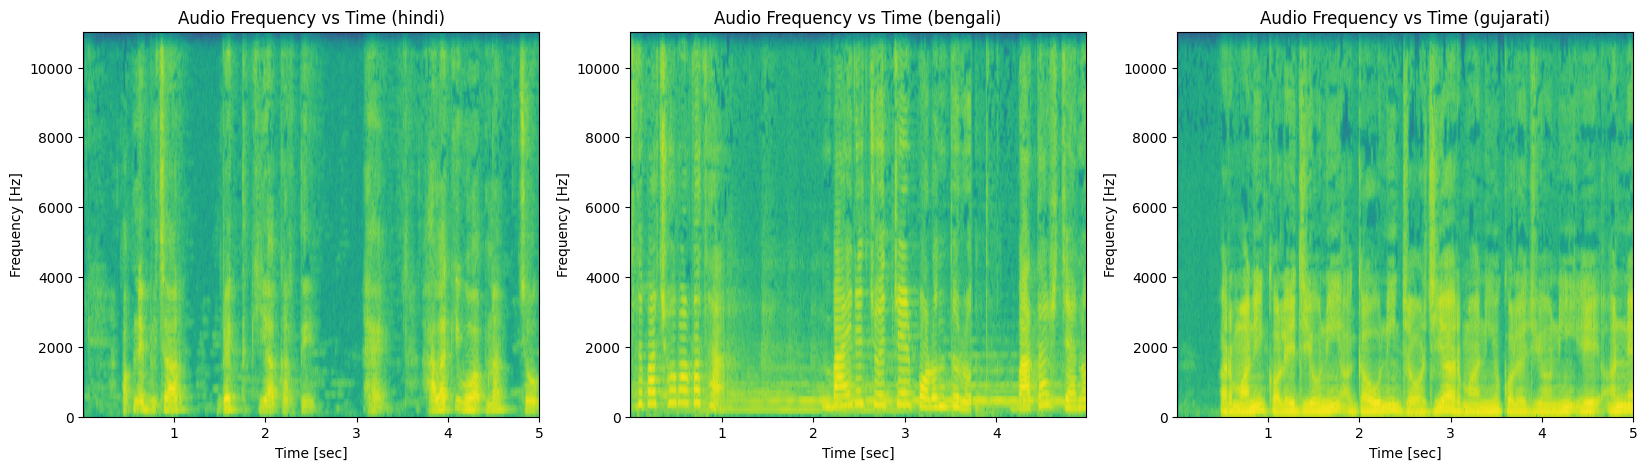

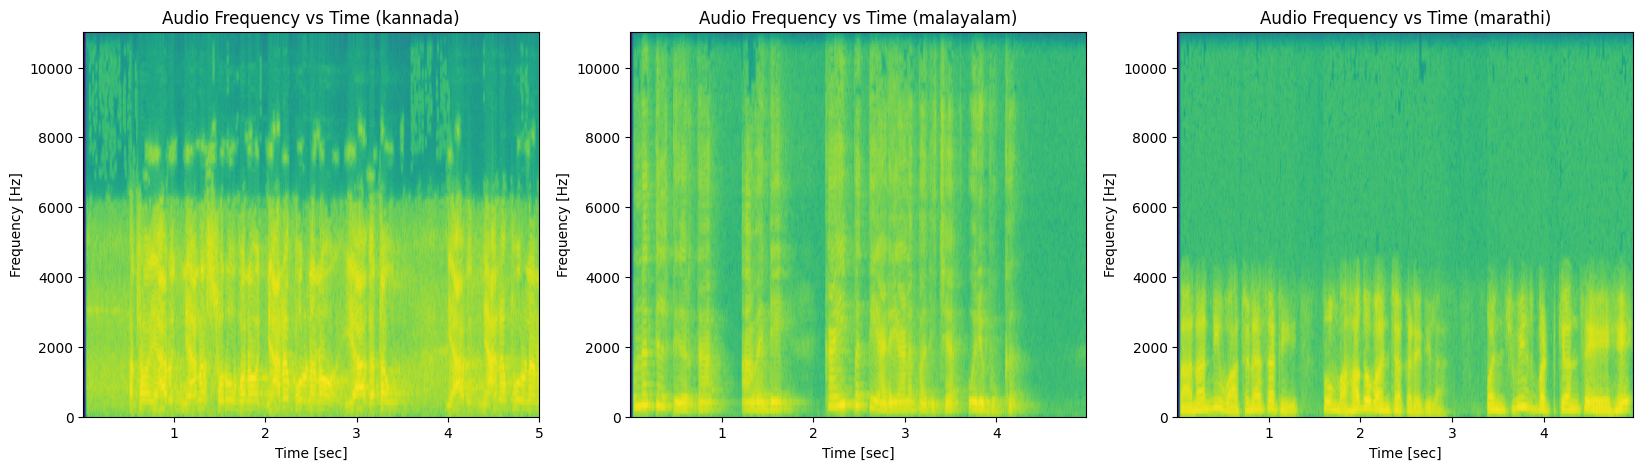

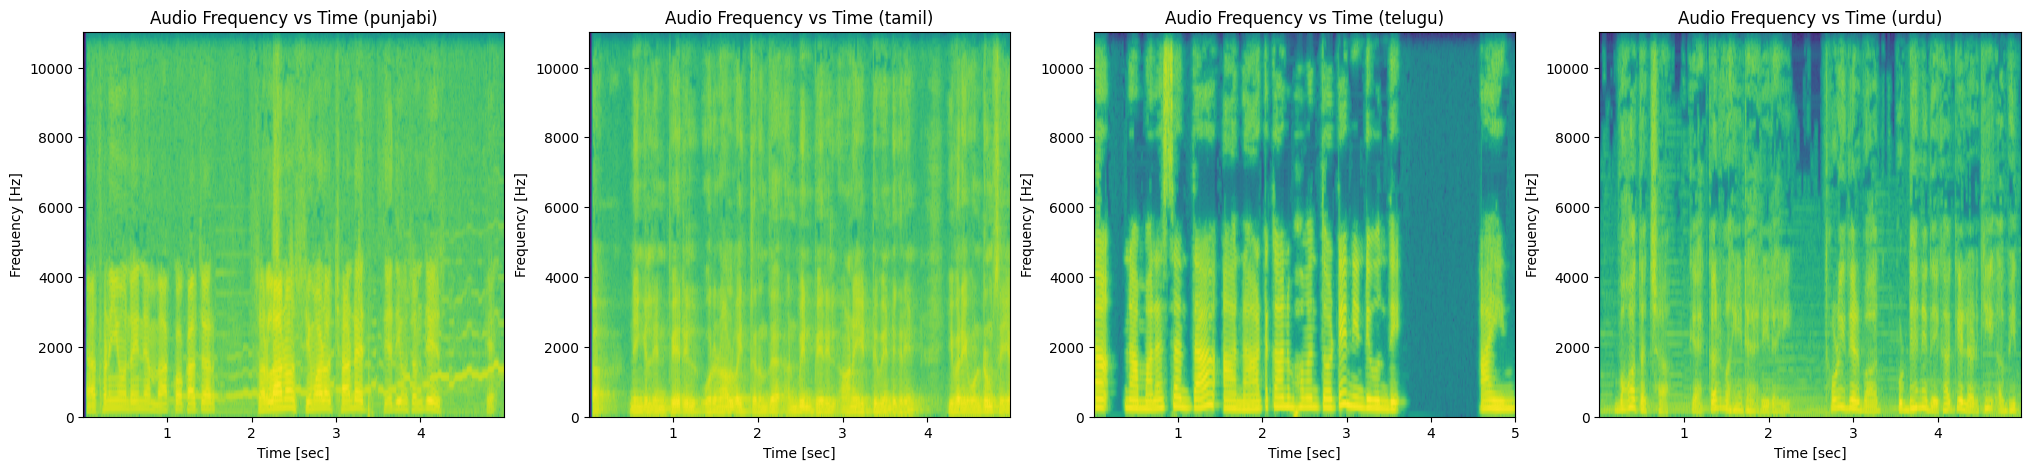

In [21]:
indian_languages_list = ['Hindi', 'Bengali', 'Gujarati']
data_dict = {}
sample_rate_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data, sample_rate = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/214.mp3')

    data_dict[f'{idx}_{lang.lower()}'] = data
    sample_rate_dict[f'{idx}_{lang.lower()}'] = sample_rate

spectogram_plot_audio(data_dict=data_dict, sample_rate_dict=sample_rate_dict, file_name='spectogram_plot_hbg')

indian_languages_list = ['Kannada', 'Malayalam', 'Marathi']
audio_file_name = '214'
data_dict = {}
sample_rate_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data, sample_rate = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/{audio_file_name}.mp3')

    data_dict[f'{idx}_{lang.lower()}'] = data
    sample_rate_dict[f'{idx}_{lang.lower()}'] = sample_rate

spectogram_plot_audio(data_dict=data_dict, sample_rate_dict=sample_rate_dict, file_name='spectogram_plot_kmm')

indian_languages_list = ['Punjabi', 'Tamil', 'Telugu', 'Urdu']
audio_file_name = '214'
data_dict = {}
sample_rate_dict = {}

for idx, lang in enumerate(indian_languages_list):
    data, sample_rate = librosa.load(f'../data/audio_dataset_indian_languages/Language Detection Dataset/{lang}/{audio_file_name}.mp3')

    data_dict[f'{idx}_{lang.lower()}'] = data
    sample_rate_dict[f'{idx}_{lang.lower()}'] = sample_rate

spectogram_plot_audio(data_dict=data_dict, sample_rate_dict=sample_rate_dict, n_rows=1, n_cols=4, figsize=(25, 5), file_name='spectogram_plot_pttu')

In [22]:
def load_data(file_name: str) -> tuple:
    try:
        audio_data, sample_rate = librosa.load(file_name, sr=None)
        audio_duration_sec = int(librosa.get_duration(y=audio_data, sr=sample_rate))

        return (sample_rate, audio_duration_sec)

    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

        return (np.nan, np.nan)

In [23]:
spoken_language_dataframe = pd.DataFrame({'file_name': [spoken_languages_train_path_dataset + file_name for file_name in os.listdir(spoken_languages_train_path_dataset)]})
spoken_language_dataframe['language_label'] = spoken_language_dataframe['file_name'].str.split('/', expand=True).iloc[:, 5].str.split('_', expand=True).iloc[:, 0].replace(to_replace={
    'de': 'german', 'en': 'english', 'es': 'spanish'})

indian_language_dataframe = pd.DataFrame({'file_name': glob.glob(indian_languages_train_path_dataset)})
indian_language_dataframe['language_label'] = indian_language_dataframe['file_name'].str.split('\\', expand=True).iloc[:, 1].str.lower()

indian_language_dataframe = indian_language_dataframe[indian_language_dataframe['language_label'] != 'punjabi']

language_dataframe = pd.concat([spoken_language_dataframe, indian_language_dataframe], ignore_index=True)
language_dataframe['file_size_kb'] = (language_dataframe['file_name'].apply(lambda x: os.path.getsize(x)) / 1024).round(3)

language_dataframe.to_csv('../data/model_data/language_dataframe_v1.csv', index=False)

for lang in tqdm(language_dataframe['language_label'].unique(), desc="Languages"):
    lang_data = language_dataframe[language_dataframe['language_label'] == lang].copy()
    lang_data[['sample_rate', 'audio_duration_sec']] = lang_data['file_name'].apply(lambda file_name: pd.Series(load_data(file_name=file_name)))

    lang_data.to_csv(f'../data/model_data/data_subset/language_dataframe_{lang}_v1.csv', index=False)

language_dataframe = pd.concat([pd.read_csv(f'../data/model_data/data_subset/language_dataframe_{lang}_v1.csv') for lang in language_dataframe['language_label'].unique()], ignore_index=True).dropna()
language_dataframe.to_csv('../data/model_data/language_dataframe_v1.csv', index=False)

language_dataframe

Languages:  33%|███▎      | 4/12 [05:11<12:21, 92.66s/it]

Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Gujarati\12867.mp3: 
Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Gujarati\13430.mp3: frames must be specified for non-seekable files
Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Gujarati\18532.mp3: frames must be specified for non-seekable files
Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Gujarati\23780.mp3: frames must be specified for non-seekable files
Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Gujarati\5774.mp3: 


Languages:  67%|██████▋   | 8/12 [13:32<07:41, 115.33s/it]

Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Marathi\24094.mp3: 


Languages:  75%|███████▌  | 9/12 [15:54<06:10, 123.62s/it]

Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Tamil\23613.mp3: 


Languages:  83%|████████▎ | 10/12 [18:16<04:18, 129.31s/it]

Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Telugu\17598.mp3: frames must be specified for non-seekable files


Languages:  92%|█████████▏| 11/12 [20:26<02:09, 129.45s/it]

Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Urdu\28349.mp3: 
Error processing ../data/audio_dataset_indian_languages/Language Detection Dataset\Urdu\5339.mp3: frames must be specified for non-seekable files


Languages: 100%|██████████| 12/12 [23:15<00:00, 116.27s/it]


file_name language_label  \
0       ../data/spoken_language_identification/train/t...         german   
1       ../data/spoken_language_identification/train/t...         german   
2       ../data/spoken_language_identification/train/t...         german   
3       ../data/spoken_language_identification/train/t...         german   
4       ../data/spoken_language_identification/train/t...         german   
...                                                   ...            ...   
303679  ../data/audio_dataset_indian_languages/Languag...           urdu   
303680  ../data/audio_dataset_indian_languages/Languag...           urdu   
303681  ../data/audio_dataset_indian_languages/Languag...           urdu   
303682  ../data/audio_dataset_indian_languages/Languag...           urdu   
303683  ../data/audio_dataset_indian_languages/Languag...           urdu   

        file_size_kb  sample_rate  audio_duration_sec  
0            241.913      22050.0                10.0  
1            247.070      22050.0                10.0  
2            235.787      22050.0                10.0  
3            236.962      22050.0                10.0  
4            239.393      22050.0                10.0  
...              ...          ...                 ...  
303679        78.794      48000.0                 5.0  
303680        78.507      44100.0                 4.0  
303681        78.915      44100.0                 5.0  
303682        39.231      48000.0                 4.0  
303683        78.507      44100.0                 4.0  

[303674 rows x 5 columns]

In [24]:
language_dataframe = pd.read_csv('../data/model_data/language_dataframe_v1.csv')

In [25]:
language_dataframe

file_name language_label  \
0       ../data/spoken_language_identification/train/t...         german   
1       ../data/spoken_language_identification/train/t...         german   
2       ../data/spoken_language_identification/train/t...         german   
3       ../data/spoken_language_identification/train/t...         german   
4       ../data/spoken_language_identification/train/t...         german   
...                                                   ...            ...   
303669  ../data/audio_dataset_indian_languages/Languag...           urdu   
303670  ../data/audio_dataset_indian_languages/Languag...           urdu   
303671  ../data/audio_dataset_indian_languages/Languag...           urdu   
303672  ../data/audio_dataset_indian_languages/Languag...           urdu   
303673  ../data/audio_dataset_indian_languages/Languag...           urdu   

        file_size_kb  sample_rate  audio_duration_sec  
0            241.913      22050.0                10.0  
1            247.070      22050.0                10.0  
2            235.787      22050.0                10.0  
3            236.962      22050.0                10.0  
4            239.393      22050.0                10.0  
...              ...          ...                 ...  
303669        78.794      48000.0                 5.0  
303670        78.507      44100.0                 4.0  
303671        78.915      44100.0                 5.0  
303672        39.231      48000.0                 4.0  
303673        78.507      44100.0                 4.0  

[303674 rows x 5 columns]

In [26]:
language_dataframe['sample_rate'].unique()

array([22050., 48000., 44100.])

In [27]:
language_dataframe['file_size_kb'].mean(), language_dataframe['file_size_kb'].median()

(108.21248958422521, 78.508)

In [28]:
language_dataframe['audio_duration_sec'].value_counts()

audio_duration_sec
4.0     144833
5.0      85293
10.0     73080
0.0        154
1.0        108
2.0        107
3.0         99
Name: count, dtype: int64

# Feature Extraction

In [ ]:
language_dataframe = pd.read_csv('../data/model_data/language_dataframe_v1.csv')

indian_languages_train_path_dataset = '../data/model_data/chunked_audio/'

language_dataframe['language_label'].unique()

In [ ]:
indian_languages = ['bengali', 'gujarati', 'hindi', 'kannada', 'malayalam', 'marathi', 'tamil', 'telugu', 'urdu']
target_sample_rate = 22050
audio_duration = 10

for lang in indian_languages:
    lang_dataframe = language_dataframe[language_dataframe['language_label'] == lang].copy()
    audio_data_list = []
    chunk_count = 0

    for idx, file_path in tqdm(enumerate(lang_dataframe['file_name'].values), total=len(lang_dataframe), desc=f"Processing {lang}"):
        audio_data_list.append(librosa.load(file_path, sr=target_sample_rate)[0])

        if (len(audio_data_list) >= 1500) or (idx == len(lang_dataframe) - 1):
            audio_chunks = tf.signal.frame(np.concatenate(audio_data_list), int(audio_duration * target_sample_rate), int(audio_duration * target_sample_rate), pad_end=True)

            for chunk_idx, audio_chunk in enumerate(audio_chunks):
                sf.write(file=f'../data/model_data/chunked_audio/{chunk_count}_{chunk_idx}_{lang}.flac', data=audio_chunk, samplerate=target_sample_rate, format='flac')

            chunk_count += 1
            audio_data_list = []


In [ ]:
data_bengali, sample_rate_bengali = librosa.load('../data/model_data/chunked_audio/0_1_bengali.flac')
print(f'Audio Data Sample Rate: {sample_rate_bengali}')
print(f'Audio Data: {data_bengali}')

ipd.Audio(data=data_bengali, rate=sample_rate_bengali)

In [ ]:
def load_data(file_name: str) -> tuple:
    try:
        audio_data, sample_rate = librosa.load(file_name, sr=None)
        audio_duration_sec = int(librosa.get_duration(y=audio_data, sr=sample_rate))

        return (sample_rate, audio_duration_sec)

    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

        return (np.nan, np.nan)

In [ ]:
spoken_language_dataframe = pd.DataFrame({'file_name': [spoken_languages_train_path_dataset + file_name for file_name in os.listdir(spoken_languages_train_path_dataset)]})
spoken_language_dataframe['language_label'] = spoken_language_dataframe['file_name'].str.split('/', expand=True).iloc[:, 5].str.split('_', expand=True).iloc[:, 0].replace(to_replace={
    'de': 'german', 'en': 'english', 'es': 'spanish'})

indian_language_dataframe = pd.DataFrame({'file_name': [indian_languages_train_path_dataset + file_name for file_name in os.listdir(indian_languages_train_path_dataset)]})
indian_language_dataframe['language_label'] = indian_language_dataframe['file_name'].str.split('_', expand=True).iloc[:, 4].str.split('.', expand=True).iloc[:, 0]

language_dataframe = pd.concat([spoken_language_dataframe, indian_language_dataframe], ignore_index=True)
language_dataframe['file_size_kb'] = (language_dataframe['file_name'].apply(lambda x: os.path.getsize(x)) / 1024).round(3)

language_dataframe.to_csv('../data/model_data/language_dataframe_v2.csv', index=False)

for lang in tqdm(language_dataframe['language_label'].unique(), desc="Languages"):
    lang_data = language_dataframe[language_dataframe['language_label'] == lang].copy()
    lang_data[['sample_rate', 'audio_duration_sec']] = lang_data['file_name'].apply(lambda file_name: pd.Series(load_data(file_name=file_name)))

    lang_data.to_csv(f'../data/model_data/data_subset/language_dataframe_{lang}_v2.csv', index=False)

language_dataframe = pd.concat([pd.read_csv(f'../data/model_data/data_subset/language_dataframe_{lang}_v2.csv') for lang in language_dataframe['language_label'].unique()], ignore_index=True).dropna()
language_dataframe.to_csv('../data/model_data/language_dataframe_v2.csv', index=False)

language_dataframe

In [ ]:
language_dataframe['language_label'].value_counts()

In [ ]:
language_dataframe['audio_duration_sec'].unique()

In [40]:
language_dataframe = pd.read_csv('../data/model_data/language_dataframe_v2.csv')

In [ ]:
def get_mfcc_features_mean(file_name: str) -> tuple:
    audio_data, sample_rate = librosa.load(file_name, sr=22050)

    return list(np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T, axis=0))


for lang in language_dataframe['language_label'].unique():
    print(f'Currently Running: {lang}')

    lang_data = language_dataframe[language_dataframe['language_label'] == lang].copy()
    lang_data['mfcc_features_mean'] = lang_data['file_name'].apply(lambda file_name: get_mfcc_features_mean(file_name=file_name))

    lang_data.to_csv(f'../data/model_data/mfcc_mean_dataframes/mfcc_data_{lang}_v1.csv', index=False)

mfcc_feature_mean_dataframe = pd.concat([pd.read_csv(f'../data/model_data/mfcc_mean_dataframes/mfcc_data_{lang}_v1.csv') for lang in language_dataframe['language_label'].unique()], ignore_index=True).dropna()
mfcc_feature_mean_dataframe.to_csv('../data/model_data/mfcc_feature_mean_dataframe_v1.csv', index=False)

In [41]:
def get_mfcc_features(file_name: str) -> tuple:
    audio_data, sample_rate = librosa.load(file_name, sr=22050)

    return librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).tolist()

In [42]:
language_dataframe = language_dataframe.groupby('language_label').apply(lambda row: row.sample(n=1000)).reset_index(drop=True)

In [44]:
for lang in language_dataframe['language_label'].unique():
    print(f'Currently Running: {lang}')

    lang_data = language_dataframe[language_dataframe['language_label'] == lang].copy()
    lang_data['mfcc_features'] = lang_data['file_name'].apply(lambda file_name: get_mfcc_features(file_name=file_name))

    lang_data.to_csv(f'../data/model_data/mfcc_dataframes/mfcc_data_{lang}_v1.csv', index=False)

mfcc_feature_dataframe = pd.concat([pd.read_csv(f'../data/model_data/mfcc_dataframes/mfcc_data_{lang}_v1.csv') for lang in language_dataframe['language_label'].unique()], ignore_index=True).dropna()
mfcc_feature_dataframe.to_csv('../data/model_data/mfcc_feature_dataframe_v1.csv', index=False)

Currently Running: bengali
Currently Running: english
Currently Running: german
Currently Running: gujarati
Currently Running: hindi
Currently Running: kannada
Currently Running: malayalam
Currently Running: marathi
Currently Running: spanish
Currently Running: tamil
Currently Running: telugu
Currently Running: urdu


In [47]:
language_dataframe_v1 = pd.read_csv('../data/model_data/language_dataframe_v1.csv')
language_dataframe_v2 = pd.read_csv('../data/model_data/language_dataframe_v2.csv')

In [48]:
language_dataframe_v1['audio_duration_sec'].value_counts()

audio_duration_sec
4.0     144833
5.0      85293
10.0     73080
0.0        154
1.0        108
2.0        107
3.0         99
Name: count, dtype: int64

In [49]:
language_dataframe_v2['audio_duration_sec'].value_counts()

audio_duration_sec
10    188050
Name: count, dtype: int64

In [50]:
language_dataframe_v1['language_label'].value_counts()

language_label
urdu         31958
bengali      27258
gujarati     26436
hindi        25462
marathi      25378
german       24360
english      24360
spanish      24360
tamil        24195
malayalam    24044
telugu       23655
kannada      22208
Name: count, dtype: int64

In [51]:
language_dataframe_v2['language_label'].value_counts()

language_label
german       24360
english      24360
spanish      24360
urdu         15939
bengali      13585
gujarati     13168
hindi        12712
marathi      12665
tamil        12040
malayalam    11989
telugu       11796
kannada      11076
Name: count, dtype: int64

In [54]:
lang_value_counts = pd.merge(
    left=pd.DataFrame(language_dataframe_v1['language_label'].value_counts()).reset_index(),
    right=pd.DataFrame(language_dataframe_v2['language_label'].value_counts()).reset_index(),
    on='language_label').rename(columns={'language_label': 'Language Labels', 'count_x': 'Before Chunking', 'count_y': 'After Chunking'})

lang_value_counts

Language Labels  Before Chunking  After Chunking
0             urdu            31958           15939
1          bengali            27258           13585
2         gujarati            26436           13168
3            hindi            25462           12712
4          marathi            25378           12665
5           german            24360           24360
6          english            24360           24360
7          spanish            24360           24360
8            tamil            24195           12040
9        malayalam            24044           11989
10          telugu            23655           11796
11         kannada            22208           11076

# Model Training